#### In this project, I have made an attempt to classify book genres according to their book cover pages using the FastAI framework and popular transfer learning models such as resnet34, resnet50 and resnet101. All these model architectures have been explored and analysed in detail to arrive at the best model for our data. 
#### Data for this has been scraped from Google Images using :

```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Go to the Google Images page from you want to download images from, and type the above code on 'console' inside the 'Inspect' available in Google Chrome.
This will get you the urls for all the images downloaded in a .csv file.

Additionally, I have used My Drive to save my data for this project. You can choose any path to do so.


In [2]:
#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
#import google drive package
from  google.colab import drive

In [5]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
from fastai.vision import *

In [7]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI_Projects/'

In [8]:
# to make folder 
(Path(root_path)/'Books').mkdir(parents=True, exist_ok=True)

In [9]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI_Projects/Books/'

In [167]:
#make folder names 
folders = ['children','horror','political','sci-fi','romance']

In [168]:
#create all folders in /Books
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [169]:
#save fastai path 
p_path = Path(proj_path)

Download the images from the csv files :

In [171]:
for file, folder in [('children.csv', 'children'), ('horror.csv', 'horror'), 
                     ('political.csv', 'political'), ('sci-fi.csv', 'sci-fi'),
                     ('romance.csv','romance')]:
    dest = p_path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(p_path/file, dest, max_pics=500)

Verify the downloaded images:

In [172]:
for folder in ('children', 'horror', 'political', 'sci-fi','romance'):
    print(folder)
    verify_images(p_path/folder, delete=True, max_size=600)

children


horror


political


sci-fi


romance


Now that we have our required image data in the folders, we can use `ImageDataBunch.from_folder` to get our data into training and validation sets, in which, labels are taken from the folder names themselves.
We also perform some standard transformations and normalisations, keeping our image size of 224x224.

In [173]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

**Data** **Exploration**

In [174]:
data

ImageDataBunch;

Train: LabelList (1957 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
children,children,children,children,children
Path: gdrive/My Drive/AI_Projects/Books;

Valid: LabelList (489 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
romance,political,political,romance,horror
Path: gdrive/My Drive/AI_Projects/Books;

Test: None

In [175]:
data.classes

['children', 'horror', 'political', 'romance', 'sci-fi']

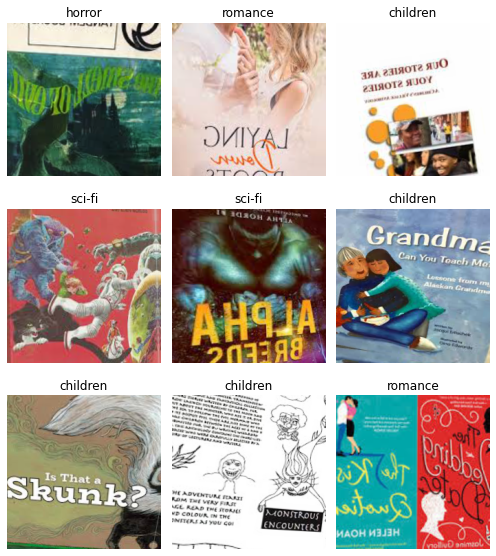

In [176]:
data.show_batch(rows=3, figsize=(7, 8))

In [177]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['children', 'horror', 'political', 'romance', 'sci-fi'], 5, 1957, 489)

Now that we have seen our data and explored it visually, it is time to get this data to training. 

## Training: ResNet34

In [178]:
from fastai.metrics import accuracy
learn = create_cnn(data, models.resnet34, metrics=accuracy)

We can have a look at the details of the model architecture by printing out `learn` as shown below:

In [179]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (1957 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
children,children,children,children,children
Path: gdrive/My Drive/AI_Projects/Books;

Valid: LabelList (489 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
romance,political,political,romance,horror
Path: gdrive/My Drive/AI_Projects/Books;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

As it is clear, resnet34 is a convolutional neural network that is 34 layers deep.

In [180]:
defaults.device = torch.device('cuda') # makes sure the gpu is used

In [181]:
torch.cuda.is_available()

True

In [182]:
# Switch off the warnings to avoid long warning messages
import warnings
warnings.filterwarnings('ignore')

Now we are going to use a training method called `fit_one_cycle`. It defines the basic training loop that is used each time you call the fit method.
For the first time, we'll run this for 4 epochs. 

In [183]:
learn.fit_one_cycle(4)

It is clear that we are at an accuracy of 65% with a very high train and validation loss.
Now, we'll `unfreeze` all the layers in the network to find the best learning rate for our model.

In [184]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

In [185]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


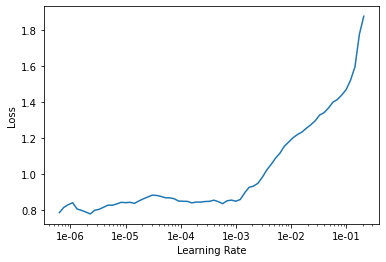

In [186]:
learn.recorder.plot()

The recorder plot shows us the variation of loss wrt learning rate. We generally look for the area of steepest downward curve in the graph before the loss starts rising exponentially high. That way, we choose learning rates appropriately.

In [187]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

As evident, we have jumped from an accuracy of 65% in the last training loop to an accuracy of 72% here, with a significantly lower training and validation loss this time around. However, this is still not good enough. Also, the model is overfitting (lower training loss than validation loss).
To solve this problem, we have to do some data cleaning.

Before going ahead, we save our model.

In [188]:
learn.save('res34-stage1')

### Data Cleaning

Fastai gives us a very convenient and hands on way to clean our data through a built in widget application inside our notebook. 

(This might not be visible in the github page because github does not support widget application previews as yet).

The app allows us to clean the top losses found in our model and also update and delete images manually. This combination of computer and human intelligence proves to be a great boost for our learning model. The cleaned data is saved in the provied path in the form of a csv file called 'cleaned.csv'. This file is then converted into a pandas dataframe so that we can work on it easily.

In [189]:
from fastai.widgets import *

In [190]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [191]:
ImageCleaner(ds, idxs, p_path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [192]:
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


In [193]:
ImageCleaner(ds, idxs, p_path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [194]:
df = pd.read_csv(p_path/'cleaned.csv', header='infer')
df.head()

name     label
0  children/00000007.jpg  children
1  children/00000005.jpg  children
2  children/00000001.jpg  children
3  children/00000002.jpg  children
4  children/00000000.jpg  children

In [195]:
df[(df['name'].apply(lambda x: len(x)<5))]

Empty DataFrame
Columns: [name, label]
Index: []

Extracting the images from the dataframe 'df' :

In [196]:
np.random.seed(42)
db = (ImageList.from_df(df, p_path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8)).normalize(imagenet_stats)

In [197]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['children', 'horror', 'political', 'romance', 'sci-fi'], 5, 1957, 489)

In [198]:
db.classes, db.c, len(db.train_ds), len(db.valid_ds)

(['children', 'horror', 'political', 'romance', 'sci-fi'], 5, 1544, 385)

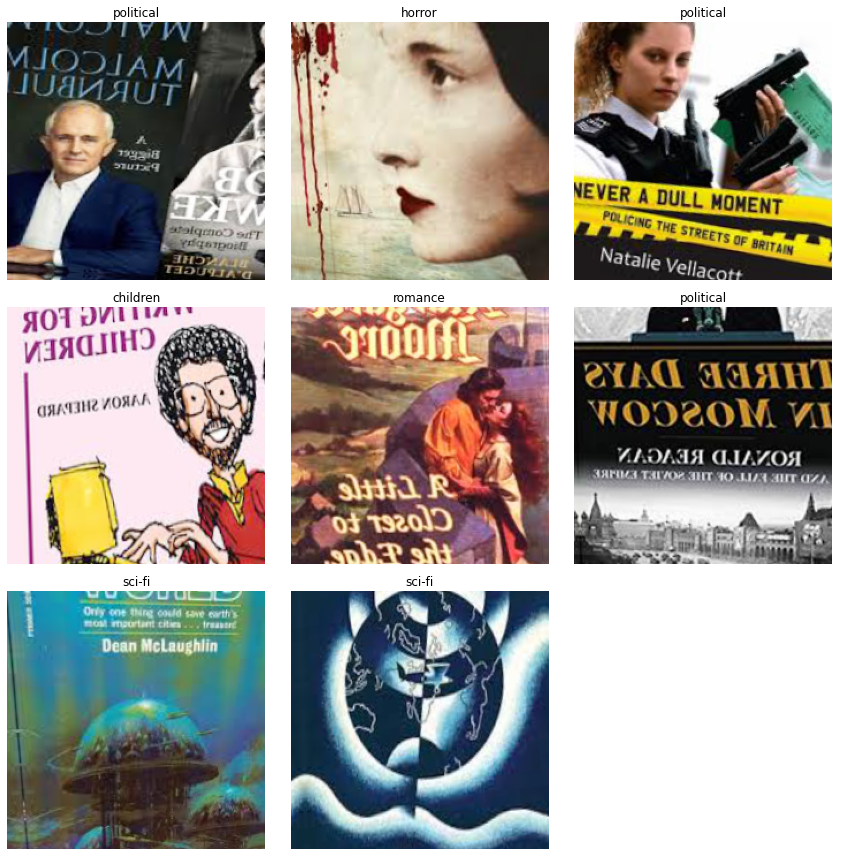

In [199]:
db.show_batch()

Now we update our model with the new and cleaned data 'db'.

In [200]:
learn.data = db

At this point, we freeze our model to avoid any further updates to the learnable parameters. After doing that, we train our frozen model with the default learning rate.

In [203]:
learn.freeze()
learn.fit_one_cycle(6)

We have reached to a pretty good accuracy of about 82.5% with permissible training and validation losses. One might want to train the model for some more epochs but looking at the trend of accuracy updations, it is clear that running more epochs would not necessarily give drastically better results.
Hence, we save our resnet34 model here for the last time.

In [204]:
learn.save('book-genre-stage2')

### Evaluation

The best way to evaluate a classifier model is to build a confusion matrix.

In [205]:
interp = ClassificationInterpretation.from_learner(learn)

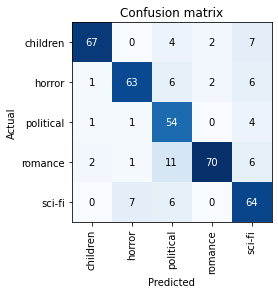

In [206]:
interp.plot_confusion_matrix()

In [207]:
interp.most_confused()

[('romance', 'political', 11),
 ('children', 'sci-fi', 7),
 ('sci-fi', 'horror', 7),
 ('horror', 'political', 6),
 ('horror', 'sci-fi', 6),
 ('romance', 'sci-fi', 6),
 ('sci-fi', 'political', 6),
 ('children', 'political', 4),
 ('political', 'sci-fi', 4),
 ('children', 'romance', 2),
 ('horror', 'romance', 2),
 ('romance', 'children', 2),
 ('horror', 'children', 1),
 ('political', 'children', 1),
 ('political', 'horror', 1),
 ('romance', 'horror', 1)]

From the above results, we can analyse where our model performed wrongly and mis-classified the data.
We can also see this visually as:

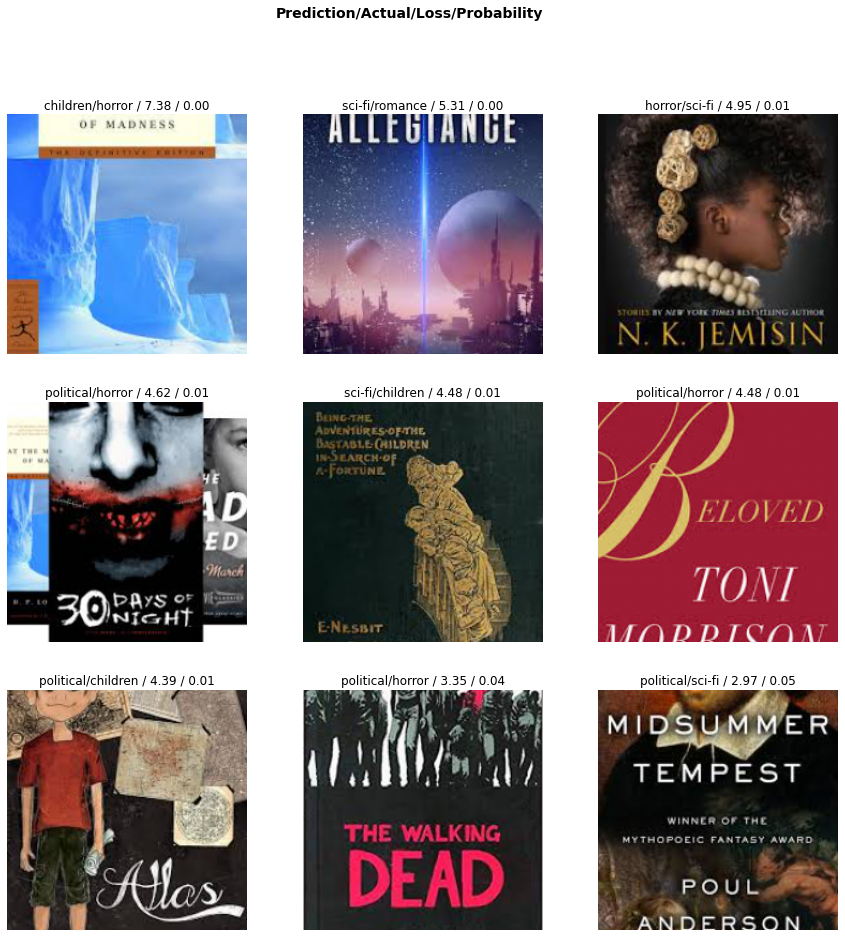

In [208]:
interp.plot_top_losses(9, figsize=(15,15))

### Predicting on test data 

It is important to check how our model is performing on unseen data, which is why below are some predictions on unseen data or test data.

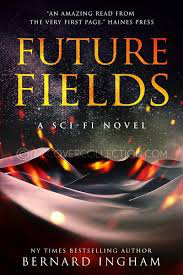

In [210]:
img = open_image('gdrive/My Drive/AI_Projects/test/f.jpeg')
img

In [211]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'sci-fi'

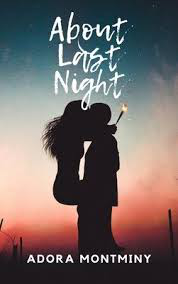

In [216]:
img1 = open_image('gdrive/My Drive/AI_Projects/test/r.jpeg')
img1

In [218]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class.obj

'romance'

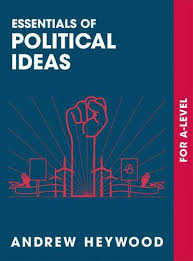

In [219]:
img2 = open_image('gdrive/My Drive/AI_Projects/test/p.jpeg')
img2

In [220]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class.obj

'sci-fi'

Out of the 3 predictions, our model got the first two images right and the last one wrong. 

Now lets move on to a bigger network called ResNet50.

# Training: ResNet50

This is a bigger network with 50 layers. Let us see how this performs compared to the previous network with 34 layers.
We are going to follow the exact same procedure here as done in the case of resnet34.

In [221]:
from fastai.metrics import accuracy
learn1 = create_cnn(data, models.resnet50, metrics=accuracy)

In [222]:
learn1

Learner(data=ImageDataBunch;

Train: LabelList (1957 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
children,children,children,children,children
Path: gdrive/My Drive/AI_Projects/Books;

Valid: LabelList (489 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
romance,political,political,romance,horror
Path: gdrive/My Drive/AI_Projects/Books;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNo

In [223]:
learn1.fit_one_cycle(4)

In [224]:
learn1.unfreeze()

In [225]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


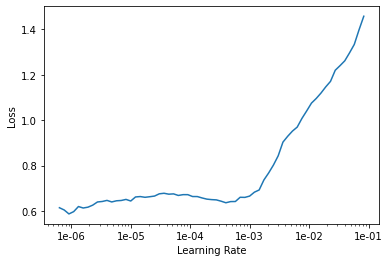

In [226]:
learn1.recorder.plot()

In [227]:
learn1.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

In [228]:
learn1.data = db

In [229]:
learn1.freeze()

In [230]:
learn1.fit_one_cycle(6)

In [231]:
learn1.fit_one_cycle(10)

Here, we have reached an accuracy of 85% as opposed to 82.5% in the previous model. We have also gotten lower training and validation losses which is a good sign.

In [233]:
learn1.save('book-genre-stage3')

### Evaluation

In [236]:
interp = ClassificationInterpretation.from_learner(learn1)

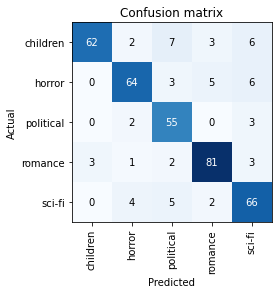

In [237]:
interp.plot_confusion_matrix()

In [238]:
interp.most_confused()

[('children', 'political', 7),
 ('children', 'sci-fi', 6),
 ('horror', 'sci-fi', 6),
 ('horror', 'romance', 5),
 ('sci-fi', 'political', 5),
 ('sci-fi', 'horror', 4),
 ('children', 'romance', 3),
 ('horror', 'political', 3),
 ('political', 'sci-fi', 3),
 ('romance', 'children', 3),
 ('romance', 'sci-fi', 3),
 ('children', 'horror', 2),
 ('political', 'horror', 2),
 ('romance', 'political', 2),
 ('sci-fi', 'romance', 2),
 ('romance', 'horror', 1)]

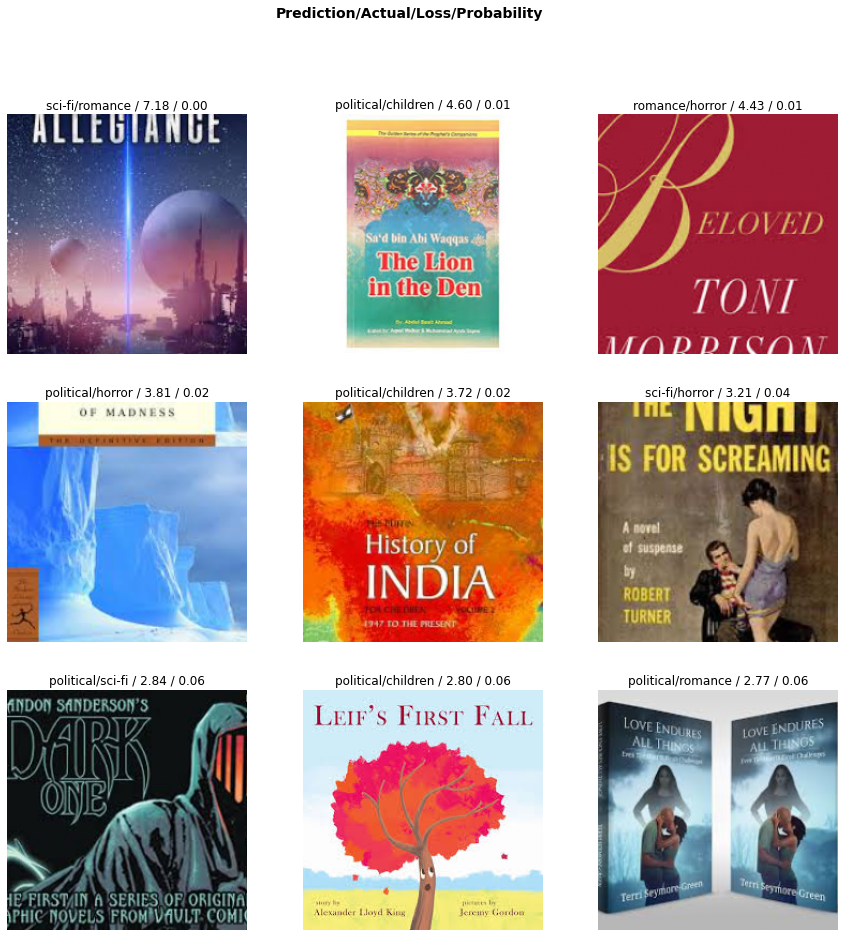

In [240]:
interp.plot_top_losses(9, figsize=(15,15))

### Prediction on test data

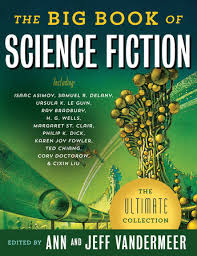

In [241]:
img3 = open_image('gdrive/My Drive/AI_Projects/test/s.jpeg')
img3

In [242]:
pred_class,pred_idx,outputs = learn1.predict(img3)
pred_class.obj

'sci-fi'

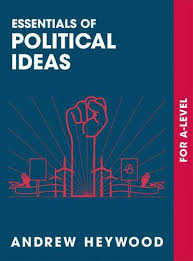

In [244]:
img2

In [243]:
pred_class,pred_idx,outputs = learn1.predict(img2)
pred_class.obj

'political'

This time we got the prediction right on 'img2' which our previous model had mis-classified.

# Training: ResNet101

In [245]:
from fastai.metrics import accuracy
learn2 = create_cnn(data, models.resnet101, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [246]:
learn2

Learner(data=ImageDataBunch;

Train: LabelList (1957 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
children,children,children,children,children
Path: gdrive/My Drive/AI_Projects/Books;

Valid: LabelList (489 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
romance,political,political,romance,horror
Path: gdrive/My Drive/AI_Projects/Books;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNo

In [247]:
learn2.fit_one_cycle(4)

In [248]:
learn2.unfreeze()

In [249]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


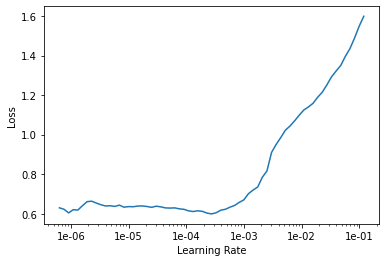

In [250]:
learn2.recorder.plot()

In [251]:
learn2.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

In [252]:
learn2.data = db

In [253]:
learn2.freeze()

In [254]:
learn2.fit_one_cycle(6)

In [271]:
learn2.fit_one_cycle(10)

In this case, we are almost able to touch 89% of accuracy with a fairly lower training and validation losses than the last model.
So, it is best that we use this model out of the three models we have seen in this project.

In [272]:
learn2.save('book-genre-stage4')

### Evaluation

In [273]:
interp = ClassificationInterpretation.from_learner(learn2)

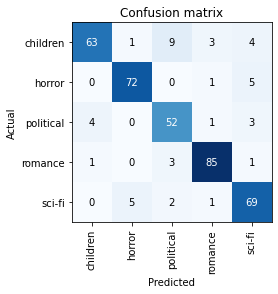

In [274]:
interp.plot_confusion_matrix()

In [275]:
interp.most_confused()

[('children', 'political', 9),
 ('horror', 'sci-fi', 5),
 ('sci-fi', 'horror', 5),
 ('children', 'sci-fi', 4),
 ('political', 'children', 4),
 ('children', 'romance', 3),
 ('political', 'sci-fi', 3),
 ('romance', 'political', 3),
 ('sci-fi', 'political', 2),
 ('children', 'horror', 1),
 ('horror', 'romance', 1),
 ('political', 'romance', 1),
 ('romance', 'children', 1),
 ('romance', 'sci-fi', 1),
 ('sci-fi', 'romance', 1)]

### Predictions

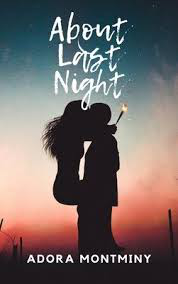

In [276]:
img4 = open_image('gdrive/My Drive/AI_Projects/test/r.jpeg')
img4

In [281]:
pred_class,pred_idx,outputs = learn2.predict(img4)
pred_class.obj

'romance'

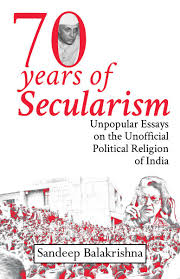

In [278]:
img5 = open_image('gdrive/My Drive/AI_Projects/test/pol.jpeg')
img5

In [282]:
pred_class,pred_idx,outputs = learn2.predict(img5)
pred_class.obj

'political'

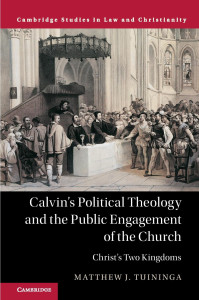

In [284]:
img6 = open_image('gdrive/My Drive/AI_Projects/test/po.jpg')
img6

In [285]:
pred_class,pred_idx,outputs = learn2.predict(img6)
pred_class.obj

'political'

Clearly, resnet101 model is doing a decently good job of classifying images of book covers.